# Network Science and Graph Learning main Notebook

This notebook uses various components (from libraries or other files in this directory) to create the illustrations and components used in the `nsgl_macquart_de_terline.pdf` project report.

Import required libraries

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

2.a. We consider the three networks: Caltech, MIT and Johns Hopkins.

We seek to plot the degree distribution for each of these.

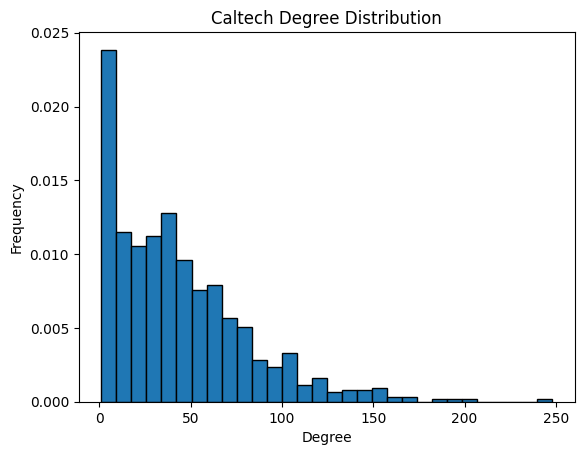

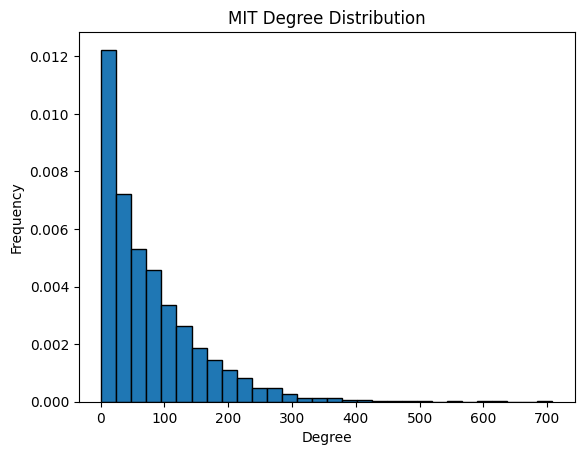

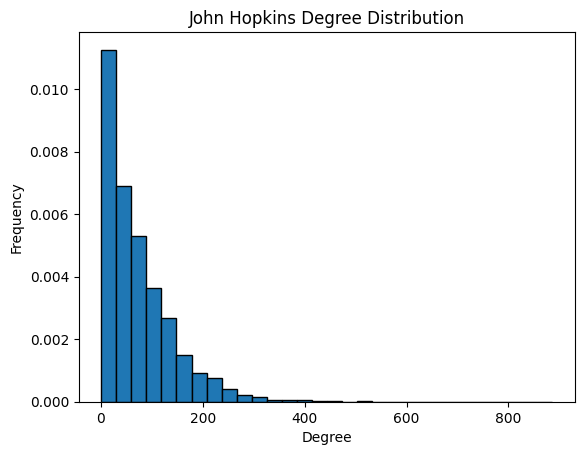

In [9]:
# Extract the data individually

caltech_gml = 'data/Caltech36.gml'
mit_gml = 'data/MIT8.gml'
john_hopkins_gml = 'data/Johns Hopkins55.gml'

# Load the graphs
caltech_graph = nx.read_gml(caltech_gml)
mit_graph = nx.read_gml(mit_gml)
john_hopkins_graph = nx.read_gml(john_hopkins_gml)

# Function to plot degree distribution
def plot_degree_distribution(graph, title, savefig=True):
    degrees = [degree for node, degree in graph.degree()]
    plt.figure()
    plt.hist(degrees, bins=30, density=True, edgecolor='black')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    if savefig:
        title = title.replace(" ", "_").lower()
        plt.savefig(f'images_buffer/{title}.png')
    plt.show()
    
# Plot degree distributions
plot_degree_distribution(caltech_graph, 'Caltech Degree Distribution')
plot_degree_distribution(mit_graph, 'MIT Degree Distribution')
plot_degree_distribution(john_hopkins_graph, 'John Hopkins Degree Distribution')
    

2.b. Compute the global clustering coeﬃcient and mean local clustering coeﬃcient for each of the 3 networks. In addition compute the edge density of each network.

In [11]:
def network_statistics(network):
    # For the network network, compute the global clustering coefficient, mean local clustering coefficient, and edge density
    return {
        'global_clustering_coefficient': nx.transitivity(network), # same as global clustering coefficient
        'mean_local_clustering_coefficient': nx.average_clustering(network), # mean local clustering coefficient
        'edge_density': nx.density(network) # edge density
    }
    
# Compute statistics for each network
caltech_stats = network_statistics(caltech_graph)
mit_stats = network_statistics(mit_graph)
john_hopkins_stats = network_statistics(john_hopkins_graph)

# Create a latex table with columns (College/University, Global Clustering Coefficient, Mean Local Clustering Coefficient, Edge Density) 
# and rows for each of the three networks through a DataFrame

stats_df = pd.DataFrame({
    'College/University': ['Caltech', 'MIT', 'John Hopkins'],
    'Global Clustering Coefficient': [caltech_stats['global_clustering_coefficient'], mit_stats['global_clustering_coefficient'], john_hopkins_stats['global_clustering_coefficient']],
    'Mean Local Clustering Coefficient': [caltech_stats['mean_local_clustering_coefficient'], mit_stats['mean_local_clustering_coefficient'], john_hopkins_stats['mean_local_clustering_coefficient']],
    'Edge Density': [caltech_stats['edge_density'], mit_stats['edge_density'], john_hopkins_stats['edge_density']]
})

latex_table = stats_df.to_latex(index=False, float_format="%.6f")
print(latex_table)


\begin{tabular}{lrrr}
\toprule
College/University & Global Clustering Coefficient & Mean Local Clustering Coefficient & Edge Density \\
\midrule
Caltech & 0.291283 & 0.409294 & 0.056404 \\
MIT & 0.180288 & 0.271219 & 0.012118 \\
John Hopkins & 0.193161 & 0.268393 & 0.013910 \\
\bottomrule
\end{tabular}



2.c. For each network, we scatter plot the degree versus local clustering coeﬃcient for each network node.

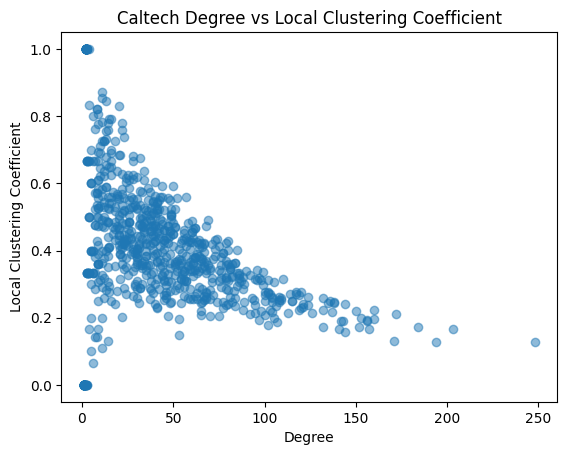

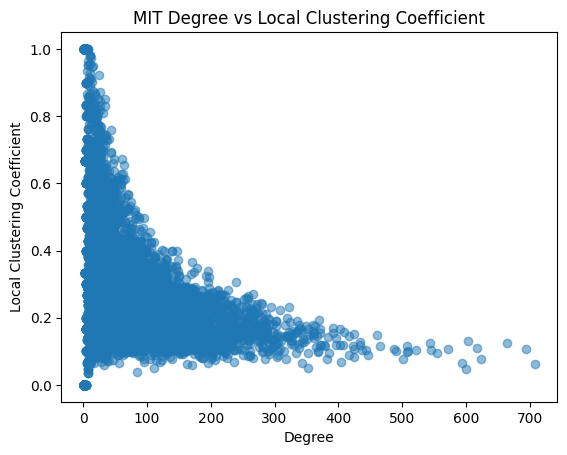

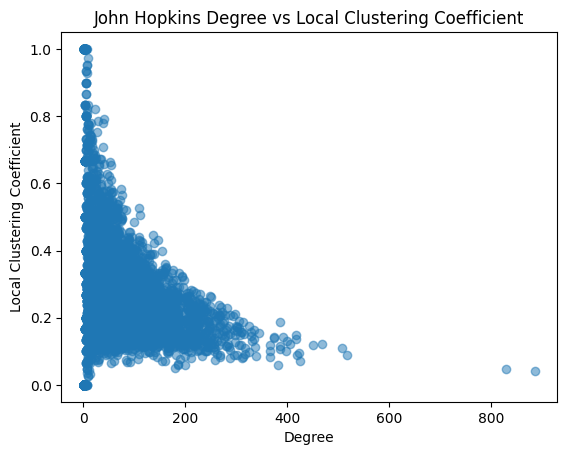

In [ ]:
# For each network, plot degree versus local clustering coefficient for each node

def plot_degree_vs_clustering(graph, title, savefig=True):
    degrees = dict(graph.degree())
    clustering_coeffs = nx.clustering(graph)
    
    degree_values = [degrees[node] for node in graph.nodes()]
    clustering_values = [clustering_coeffs[node] for node in graph.nodes()]
    
    plt.figure()
    plt.scatter(clustering_values, degree_values, alpha=0.5)
    plt.title(title)
    plt.xlabel('Local Clustering Coefficient')
    plt.ylabel('Degree')
    if savefig:
        title = title.replace(" ", "_").lower()
        plt.savefig(f'images_buffer/{title}.png')
    plt.show()
    
plot_degree_vs_clustering(caltech_graph, 'Caltech Degree vs Local Clustering Coefficient')
plot_degree_vs_clustering(mit_graph, 'MIT Degree vs Local Clustering Coefficient')
plot_degree_vs_clustering(john_hopkins_graph, 'John Hopkins Degree vs Local Clustering Coefficient')

In [ ]:
# List all GML files in the data directory
metrics = []
files = glob.glob('data/*.gml')

print(f"Found {len(files)} networks.")

for index, file in enumerate(files):
    
    print(f"Starting treatment for file {index + 1}/{len(files)}")
    
    # Read the graph
    # FB100 files are GML. 
    G = nx.read_gml(file)
    # Treat as simple graph (undirected, no self-loops/multiedges)
    G = nx.Graph(G)
    
    # Get network size
    n = G.number_of_nodes()
    
    # Calculate assortativity for each attribute
    # (i) student/faculty status ('student_fac')
    try:
        r_student = nx.attribute_assortativity_coefficient(G, 'student_fac')
    except Exception as e:
        r_student = np.nan
        
    # (ii) major ('major_index')
    try:
        r_major = nx.attribute_assortativity_coefficient(G, 'major_index')
    except Exception as e:
        r_major = np.nan

    # (iii) vertex degree
    try:
        r_degree = nx.degree_assortativity_coefficient(G)
    except Exception as e:
        r_degree = np.nan
        
    # (iv) dorm ('dorm')
    try:
        r_dorm = nx.attribute_assortativity_coefficient(G, 'dorm')
    except Exception as e:
        r_dorm = np.nan
        
    # (v) gender ('gender')
    try:
        r_gender = nx.attribute_assortativity_coefficient(G, 'gender')
    except Exception as e:
        r_gender = np.nan
        
    metrics.append({
        'network': os.path.basename(file),
        'n': n,
        'student_fac': r_student,
        'major': r_major,
        'degree': r_degree,
        'dorm': r_dorm,
        'gender': r_gender
    })

df_metrics = pd.DataFrame(metrics)
# Display first few rows to verify
print(df_metrics.head())
print(df_metrics.info())

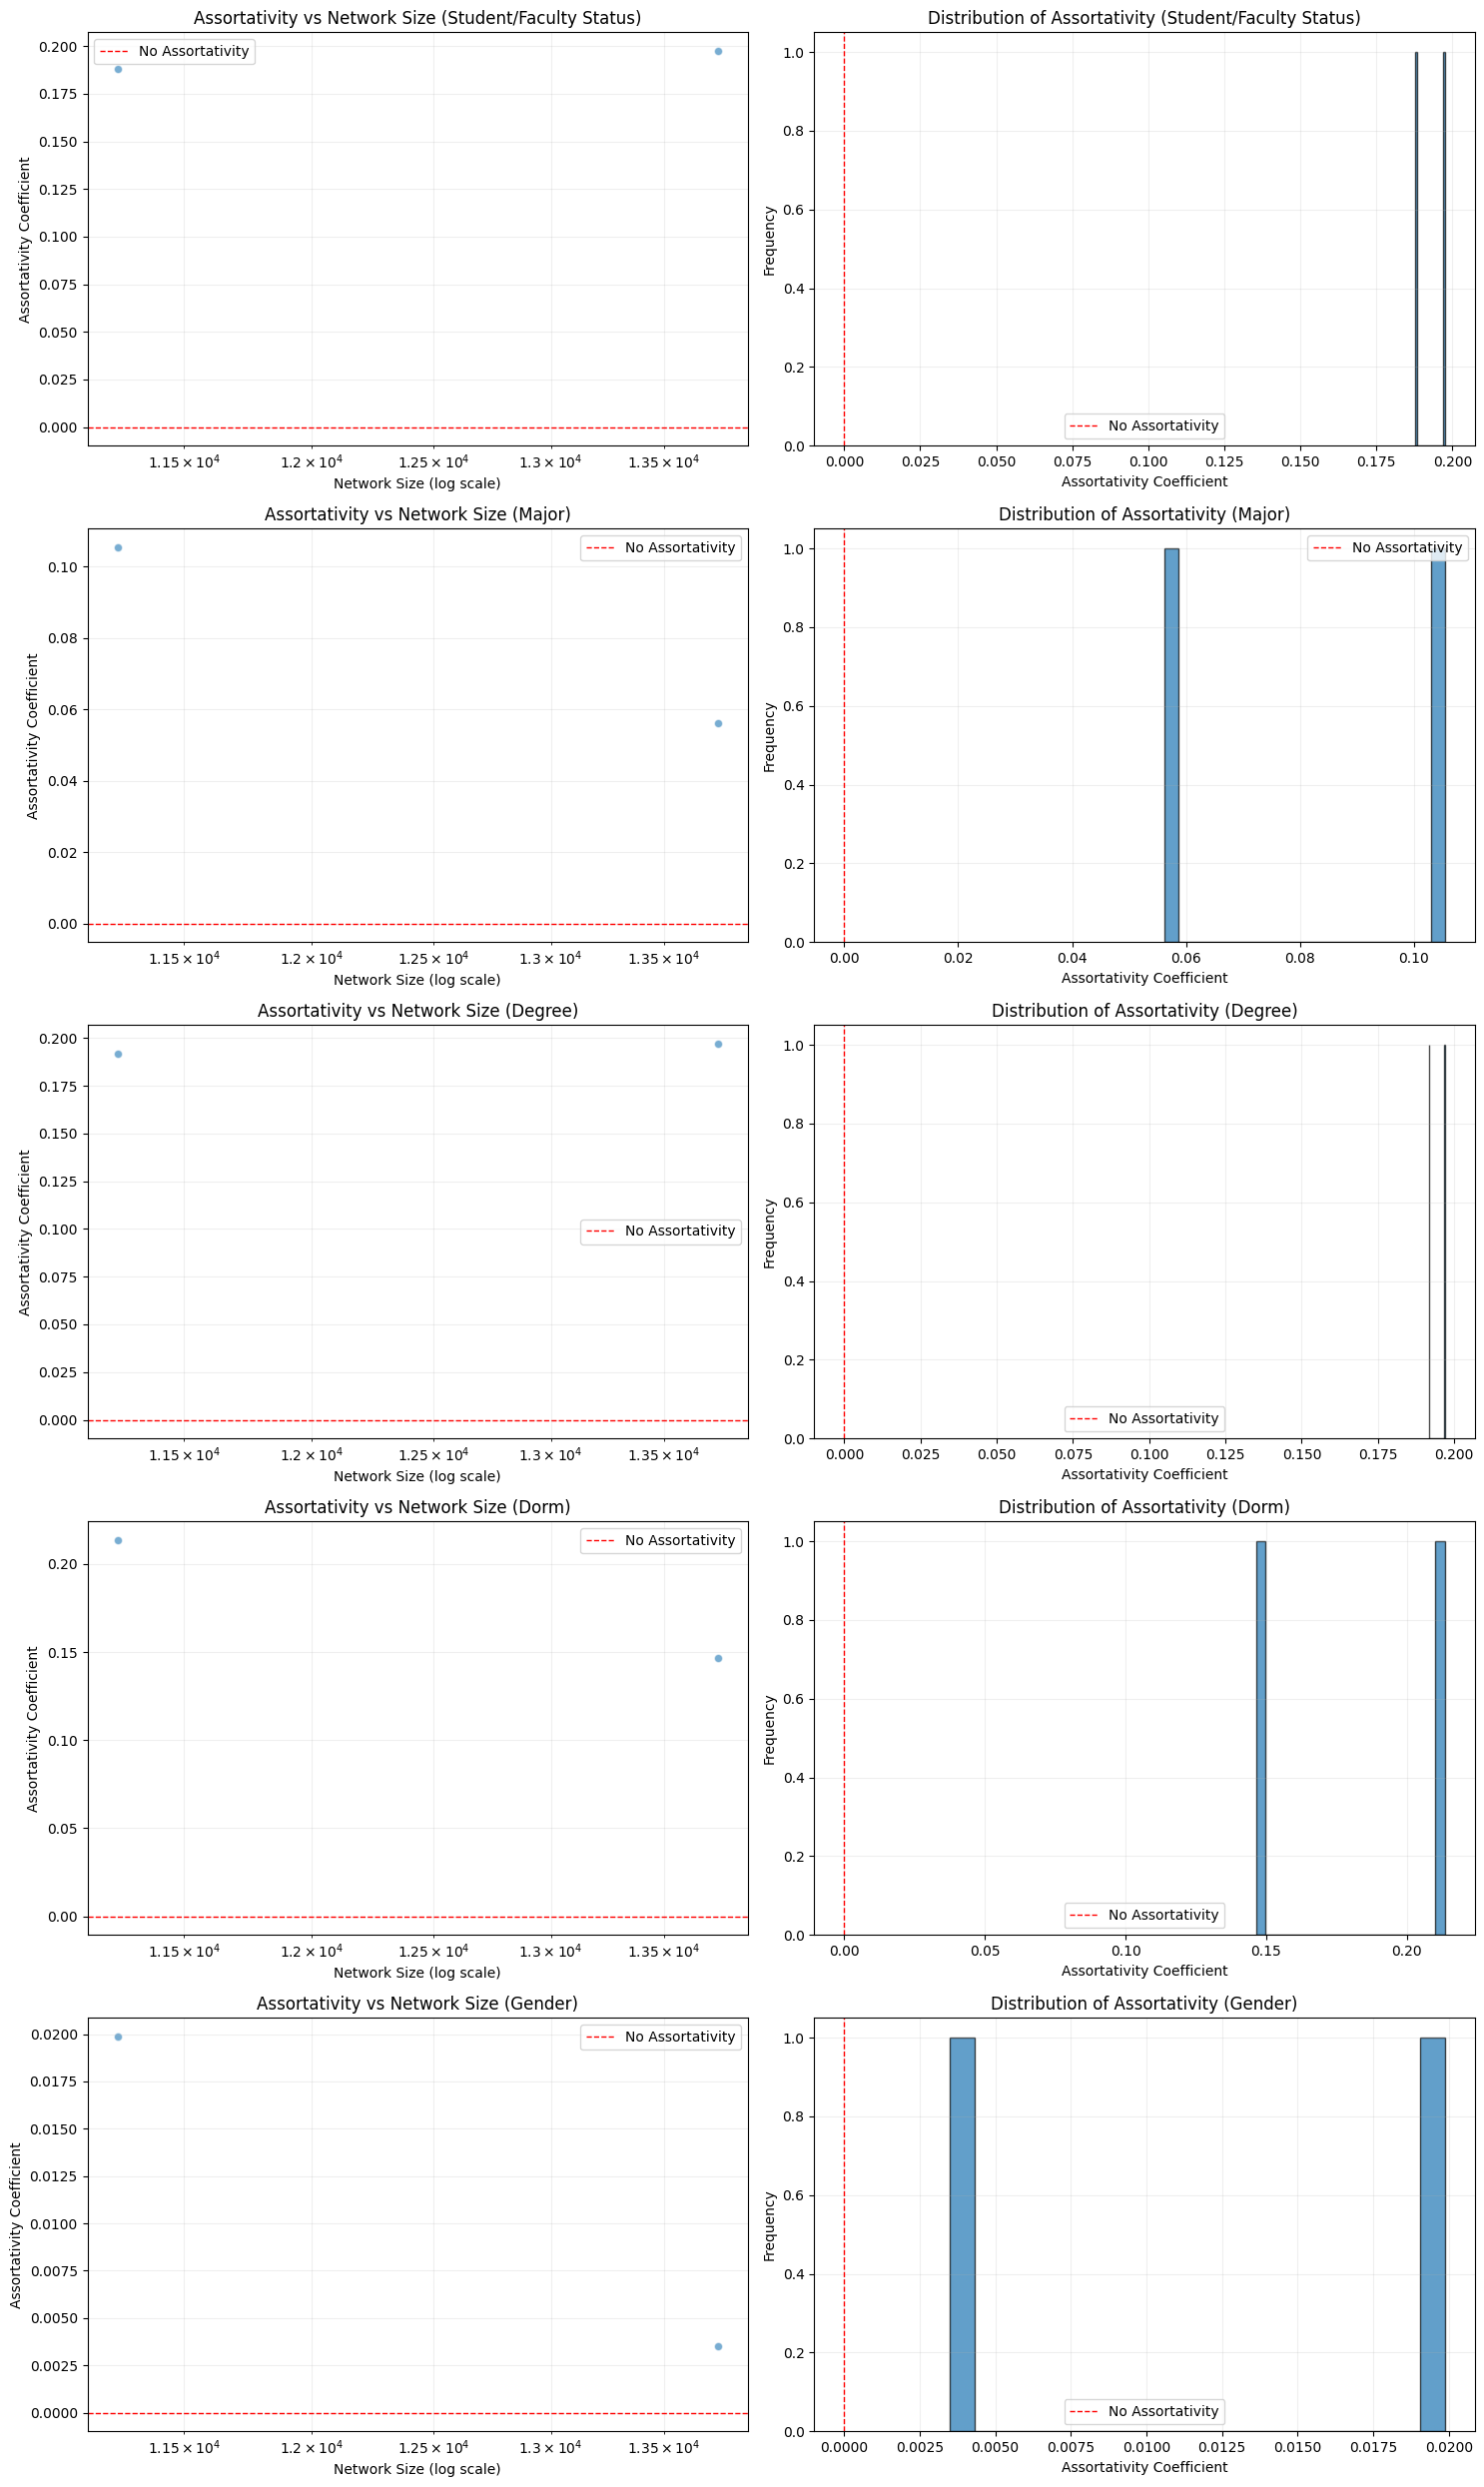

In [5]:
# Plotting the results
attributes = ['student_fac', 'major', 'degree', 'dorm', 'gender']
titles = ['Student/Faculty Status', 'Major', 'Degree', 'Dorm', 'Gender']

# Create a figure with subplots (5 rows, 2 columns)
# Left column: Scatter plot (Assortativity vs Network Size)
# Right column: Histogram (Distribution of Assortativity)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
plt.subplots_adjust(hspace=0.4)

for i, attr in enumerate(attributes):
    # Scatter plot
    ax_scatter = axes[i, 0]
    ax_scatter.scatter(df_metrics['n'], df_metrics[attr], alpha=0.6, edgecolors='w')
    ax_scatter.set_xscale('log')
    ax_scatter.axhline(0, color='red', linestyle='--', linewidth=1, label='No Assortativity')
    ax_scatter.set_title(f'Assortativity vs Network Size ({titles[i]})')
    ax_scatter.set_xlabel('Network Size (log scale)')
    ax_scatter.set_ylabel('Assortativity Coefficient')
    ax_scatter.grid(True, which="both", ls="-", alpha=0.2)
    
    # Histogram
    ax_hist = axes[i, 1]
    # Remove NaN values for histogram
    data = df_metrics[attr].dropna()
    ax_hist.hist(data, bins=20, edgecolor='black', alpha=0.7)
    ax_hist.axvline(0, color='red', linestyle='--', linewidth=1, label='No Assortativity')
    ax_hist.set_title(f'Distribution of Assortativity ({titles[i]})')
    ax_hist.set_xlabel('Assortativity Coefficient')
    ax_hist.set_ylabel('Frequency')
    ax_hist.grid(True, alpha=0.2)
    
    # Add legend
    ax_scatter.legend()
    ax_hist.legend()

plt.tight_layout()
plt.show()